**The original salaries dataset**

- So far, we've been looking at a modified version of the data professionals dataset. 
- Let's print summary information about our original DataFrame.

In [ ]:
print(salaries.info())

- The first thing that jumps out is that the Salary_USD column we've been working with is not present, but there's a column called Salary_In_Rupees, referring to India's currency.

In [ ]:
# This code snippet shows the information of a pandas DataFrame.
# It displays the data types of each column, the number of non-null entries, and the total memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 9 columns):
#   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
0   Working_Year          594 non-null    int64   
1   Designation           567 non-null    object  
2   Experience            561 non-null    object  
3   Employment_Status     563 non-null    object  
4   Salary_In_Rupees      566 non-null    object  
5   Employee_Location     554 non-null    object  
6   Company_Location      570 non-null    object  
7   Company_Size          535 non-null    object  
8   Remote_Working_Ratio  571 non-null    float64 
dtypes: float64(1), int64(1), object(7)
memory usage: 41.9+ KB
None

**Salary in rupees**

- Previewing this column, we see that the values contain commas, and the data type is object.

In [ ]:
print(salaries["Salary_In_Rupees"].head())

In [ ]:
0     20,688,070.00
1      8,674,985.00
2      1,591,390.00
3     11,935,425.00
4      5,729,004.00
Name: Salary_In_Rupees, dtype: object

# **Converting strings to numbers**

- To obtain Salary in USD we'll need to perform a few tasks. 
- First, we need to remove the commas from the values in the Salary_In_Rupees column. 
- Next, we change the data type to float. 
- Lastly, we'll make a new column by converting the currency.

- Remove comma values in `Salary_In_Rupees`

- Convert the column to `float` data type

- Create a new column by converting the currency

**To remove commas, we can use the pandas Series-dot-string-dot-replace method.** 
- We first pass the characters we want to remove, followed by the characters to replace them with. 
- As we don't want to add characters back in, when we update the column we provide an empty string in this part of the method. 
- Printing the first five rows of this column, we see the commas have been removed. 
- However, the column is still object data type.

In [ ]:
# Replace characters in a pandas Series
pd.Series.str.replace("characters to remove", "characters to replace them with")

# Replace commas with empty strings in the "Salary_In_Rupees" column of the salaries DataFrame.
salaries["Salary_In_Rupees"] = salaries["Salary_In_Rupees"].str.replace(",", "")
print(salary["Salary_In_Rupees"].head())

In [ ]:
1     20688070.00
2     8674985.00
3     1591390.00
4    11935425.00
5     5729004.00
Name: Salary_In_Rupees, dtype: object

**We update the data type to float.** 

- We've looked up the conversation rate from Indian rupees to US dollars, and currently one rupee is worth one-point-two cents. 
- To create the Salary_USD column we multiply the values in the rupees column by zero-point-zero-one-two.

In [ ]:
# Convert the 'Salary_In_Rupees' column to float data type.
salaries["Salary_In_Rupees"] = salaries["Salary_In_Rupees"].astype(float)

- 1 Indian Rupee = 0.012 US Dollars

In [ ]:
salaries["Salary_USD"] = salaries["Salary_In_Rupees"] * 0.012

**Previewing the new column**

- Printing the first five rows of the original and new column, we can see that values in Salary_USD are equal to one-point-two percent of the Salary_In_Rupees column.

In [ ]:
print(salaries[["Salary_In_Rupees", "Salary_USD"]].head())

In [ ]:
Salary_In_Rupees  Salary_USD
0    20688070.0   248256.840
1     8674985.0   104099.820
2     1591390.0    19096.680
3    11935425.0   143225.100
4     5729004.0    68748.048

**Adding summary statistics into a DataFrame**

- Recall that we've previously used pandas' groupby function to calculate summary statistics. 
- Here, we find the mean salary in US dollars by company size. 
- While this is useful, sometimes we might prefer to add summary statistics directly into our DataFrame, rather than creating a summary table.

In [ ]:
# Calculate the mean salary for each company size.
salaries.groupby("Company_Size")["Salary_USD"].mean()

In [ ]:
Company_Size
L    111934.432174
M    110706.628527
S     69880.980179
Name: Salary_USD, dtype: float64

- Let's say we would like to create a new column containing the standard deviation of Salary_USD, where values are conditional based on the Experience column. 
- The first step still involves a groupby, done here with the Experience column.

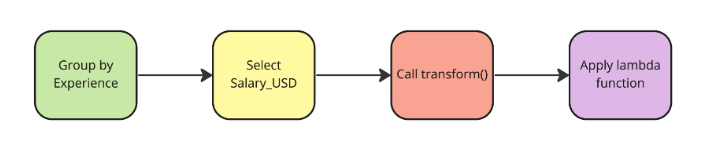

In [ ]:
# Calculate the standard deviation of salary for each experience level
salaries["std_dev"] = salaries.groupby("Experience")["Salary_USD"].transform(lambda x: x.std())

- We can select more than one column and use the value_counts method. 
- This prints the combinations of values for the columns we have chosen, in this case Experience and newly created std_dev columns. 
- For example, there are 257 rows with SE, or Senior-level, experience, and the standard deviation in salary for this group is nearly 53000 dollars. Unsurprisingly, there appears to be a larger variation in salary associated with the most senior role, Executive.

In [ ]:
# Assuming 'salaries' is a pandas DataFrame with columns 'Experience' and 'std_dev'
print(salaries[["Experience", "std_dev"]].value_counts())

In [ ]:
Experience    std_dev          
SE            52995.385395     257
MI            63217.397343     197
EN            43367.256303     83
EX            86426.611619     24

- We can repeat this process for other summary statistics! 
- Here, we add a column for the median salary based on company size. 
- We use a backslash to split our code over two lines, otherwise it is quite long and difficult to read. 
- Previewing the two columns of interest we see the values have been mapped correctly and that medium-sized companies have the largest median salary!

In [ ]:
salaries ["median_by_comp_size"] = salaries.groupby("Company_Size") \ 
                                        ["Salary_USD"].transform(lambda x: x.median())

In [ ]:
# Print the first few rows of the 'Company_Size' and 'median_by_comp_size' columns from the 'salaries' DataFrame.
print(salaries[["Company_Size", "median_by_comp_size"]].head())

In [ ]:
  Company_Size   median_by_comp_size
0            S             60833.424
1            M            105914.964
2            S             60833.424
3            L             95483.400
4            L             95483.400